Resources and notes:
- This [blog](https://www.esri.com/arcgis-blog/products/api-python/developers/enhancements-to-the-map-widget-of-the-arcgis-api-for-python) outlines the differences between renderers and map widgets between v2.3.1- and v2.4.0+
- [This application from the Maps SDK for JavaScript team](https://developers.arcgis.com/javascript/latest/visualization/symbols-color-ramps/symbol-builder/) lets you mock up a symbol and view it's JSON
- At v2.4.0+, the map widget uses `Map.content` to manage layers/tables. Access using `arcgis.map`
- Here is the tutorial on the help doc for [customizing layer symbology](https://developers.arcgis.com/python/latest/guide/part3-visualizing-spatial-data-on-the-map-widget/#:~:text=True-,Customizing%20layer%20symbology,-While%20calling%20the)
- When using the MapContent manager, the `add` method's parameter `drawing_info` let's you pass in a dictionary supplying drawing info.

In [2]:
from arcgis.gis import GIS
from arcgis.map import Map

<User username:tkinlaw>
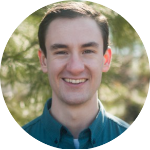

In [3]:
gis = GIS("Pro")
gis.users.me

## Access the web map

In [3]:
webMap = gis.content.get('9ec6f6aa5b8b4be7905f9f82d3433167')
myMap = Map(webMap)

In [18]:
myMap.content.add(gis.content.get('4942952084ec4a06a4cd471d546950d7'), drawing_info=renderer)

In [22]:
webMap.get_data()

{'operationalLayers': [{'id': '19bbe68a0aa-layer-1',
   'title': 'GasStations',
   'url': 'https://services9.arcgis.com/jO1WGLJL8KkEqHPJ/arcgis/rest/services/GasStations/FeatureServer/0',
   'itemId': '4942952084ec4a06a4cd471d546950d7',
   'layerType': 'ArcGISFeatureLayer',
   'layerDefinition': {'fieldConfigurations': [{'name': 'PERMIT_NO',
      'fieldFormat': {'type': 'number', 'useGrouping': 'never'}},
     {'name': 'ZIP_CODE',
      'fieldFormat': {'type': 'number',
       'maximumFractionDigits': 6,
       'minimumFractionDigits': 6,
       'useGrouping': 'never'}},
     {'name': 'PUMPS',
      'fieldFormat': {'type': 'number', 'useGrouping': 'never'}},
     {'name': 'CNG_DEV',
      'fieldFormat': {'type': 'number', 'useGrouping': 'never'}}]}}],
 'baseMap': {'baseMapLayers': [{'id': '19bbe689b47-layer-0',
    'title': 'World Topo Map',
    'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    'layerType': 'ArcGISTiledMapServiceLayer'}],
  

## Acquire the target layer

In [49]:
myMap.content.layers[0].properties['drawingInfo']['renderer'] = {
    "type": "simple",
    "symbol": {
      "color": [
        156,
        83,
        0,
        255
      ],
      "width": 6.75,
      "type": "esriSLS",
      "style": "esriSLSSolid"
    }
  }

In [50]:
myMap.content.layers[0].properties['drawingInfo']

{'renderer': {'type': 'simple',
  'symbol': {'color': [156, 83, 0, 255],
   'width': 6.75,
   'type': 'esriSLS',
   'style': 'esriSLSSolid'}},
 'scaleSymbols': True,
 'transparency': 0,
 'labelingInfo': None}

## Create new symbology dictionary

## Apply the change

# Attempt with item.get_data()

In [55]:
webMap.get_data() # I don't see the renderer in here

{'operationalLayers': [{'id': '19bbe68a0aa-layer-1',
   'title': 'GasStations',
   'url': 'https://services9.arcgis.com/jO1WGLJL8KkEqHPJ/arcgis/rest/services/GasStations/FeatureServer/0',
   'itemId': '4942952084ec4a06a4cd471d546950d7',
   'layerType': 'ArcGISFeatureLayer',
   'layerDefinition': {'fieldConfigurations': [{'name': 'PERMIT_NO',
      'fieldFormat': {'type': 'number', 'useGrouping': 'never'}},
     {'name': 'ZIP_CODE',
      'fieldFormat': {'type': 'number',
       'maximumFractionDigits': 6,
       'minimumFractionDigits': 6,
       'useGrouping': 'never'}},
     {'name': 'PUMPS',
      'fieldFormat': {'type': 'number', 'useGrouping': 'never'}},
     {'name': 'CNG_DEV',
      'fieldFormat': {'type': 'number', 'useGrouping': 'never'}}]}}],
 'baseMap': {'baseMapLayers': [{'id': '19bbe689b47-layer-0',
    'title': 'World Topo Map',
    'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    'layerType': 'ArcGISTiledMapServiceLayer'}],
  

# Use map.content.renderer

In [74]:
gsRenderer = myMap.content.renderer(0)
gsRenderer.renderer

AttributeError: 'NoneType' object has no attribute 'renderer'

# Following the help doc

In [4]:
freeway_item = gis.content.get('91c6a5f6410b4991ab0db1d7c26daacb')
freeway_sdf = freeway_item.layers[0]
freeway_fset = freeway_sdf.query(where="DIST_KM>2800", as_df=False)
freeway_fset

<FeatureSet> 7 features

In [5]:
map5 = gis.map('USA')
map5

Map()

In [13]:
map5.zoom = 6
map5.center = [39,-98]
map5.content.add(freeway_fset, drawing_info=renderer)

In [17]:
renderer = {
  "type": "esriSMS",
  "color": [
    255,
    255,
    255,
    64
  ],
  "angle": 0,
  "xoffset": 0,
  "yoffset": 0,
  "size": 12,
  "style": "esriSMSCircle",
  "outline": {
    "type": "esriSLS",
    "color": [
      0,
      122,
      194,
      255
    ],
    "width": 1,
    "style": "esriSLSSolid"
  }
}

In [8]:
help(map5.content.add)

Help on method add in module arcgis.map.map_widget:

add(
    item: '_gis_mod.Item | _gis_mod.Layer | features.Table | features.FeatureCollection | pd.DataFrame | list | str',
    drawing_info: 'dict | None' = None,
    popup_info: 'popups.PopupInfo' = None,
    index: 'int | None' = None,
    options: 'dict | None' = None
) -> 'None' method of arcgis.map.map_widget.MapContent instance
    Add a layer or table to the map.

    .. note::
        The spatial reference of the map is derived from the basemap layer.
        If the spatial reference of the layer being added is different from the map's spatial reference, you may not see it render correctly.
        You can set the layer as the basemap to change the map's spatial reference.

    ==================      =====================================================================
    **Parameter**           **Description**
    ------------------      ---------------------------------------------------------------------
    item        